In [3]:
# Gives the discrete, linear convolution of two one-dimensional sequences.
# some goodies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import convolutionF as F
from scipy.stats import norm

<function matplotlib.pyplot.show>

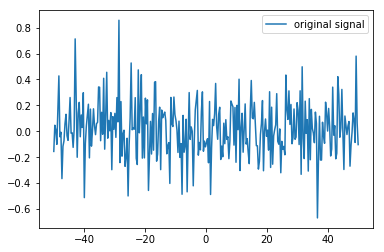

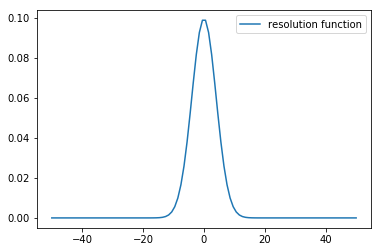

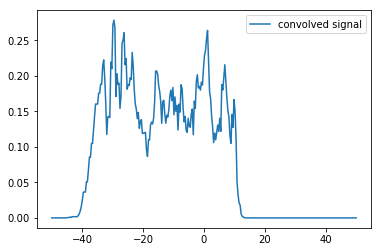

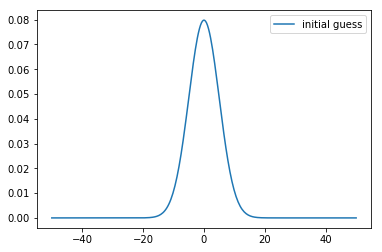

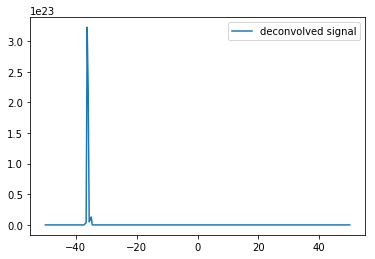

In [4]:

x = np.linspace(-50, 50, 100)
xs=np.linspace(-50, 50, 300)

sig1= norm.pdf(x,0,10) #original signal1
sig2=norm.pdf(x,10,2) #original signal 2
sig3=norm.pdf(x,30,4) #original signal 3

sigt=np.hstack((sig1,sig2,sig3)) #original total signal
#print(sig.size)

# Adding noise to the signal
sig = sigt + 0.2 * np.random.normal(size=len(xs))

RF=norm.pdf(x,0,4) #resolution function
ini=norm.pdf(xs,0,5) #initial guess
#print(RF.size)

plt.figure() #plot the original signal
plt.plot(xs,sig, label='original signal')
plt.legend()
plt.show

plt.figure() # plot the resolution function
plt.plot(x,RF,label='resolution function')
plt.legend()
plt.show  

S=F.convolve(sig,RF,'same') #convolved signal 

plt.figure() #plot the colvolved signal
plt.plot(xs,S,label='convolved signal')
plt.legend()
plt.show                                         

plt.figure() #plot the initial guess
plt.plot(xs,ini, label='initial guess')
plt.legend()
plt.show

g='same'
I=F.deconvolve(sig,RF,ini,g,'iteration',100)  #deconvolved signal  

plt.figure() #plot the deconvolved signal
plt.plot(xs,I,label='deconvolved signal')
plt.legend()
plt.show  



